In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [23]:
orders_data=pd.read_csv('orders_2016-2020_Dataset.csv')
reviews_data=pd.read_csv('C:review_dataset (1).csv')

In [24]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Order #                          2297 non-null   object 
 1   Order Date and Time Stamp        2297 non-null   object 
 2   Fulfillment Status               2297 non-null   object 
 3   Payment Status                   2297 non-null   object 
 4   Payment Date and Time Stamp      240 non-null    object 
 5   Fulfillment Date and Time Stamp  229 non-null    object 
 6   Currency                         2297 non-null   object 
 7   Subtotal                         2297 non-null   object 
 8   Shipping Method                  2297 non-null   object 
 9   Shipping Cost                    2297 non-null   object 
 10  Tax Method                       1 non-null      object 
 11  Taxes                            2297 non-null   object 
 12  Total               

1. Analysis of Reviews given by Customers 
2. Analysis of different payment methods used by the Customers 
3. Analysis of Top Consumer States of India 
4. Analysis of Top Consumer Cities of India 
5. Analysis of Top Selling Product Categories 
6. Analysis of Reviews for All Product Categories 
7. Analysis of Number of Orders Per Month Per Year 
8. Analysis of Reviews for Number of Orders Per Month Per Year 
9. Analysis of Number of Orders Across Parts of a Day 
10. Full Report
Enter the analysis you wish to see : 10


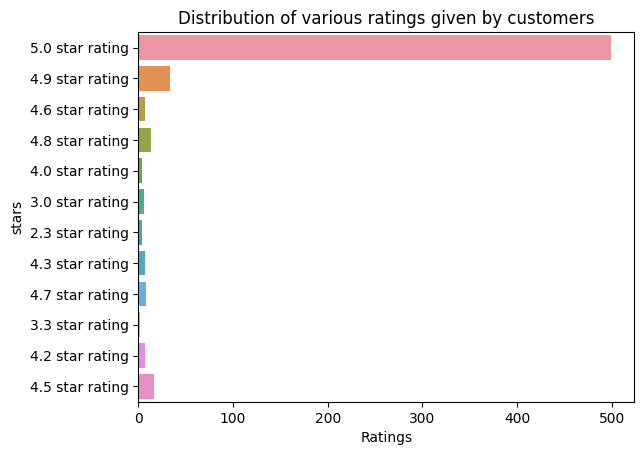

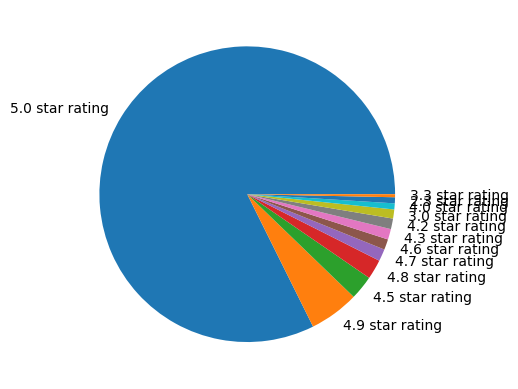

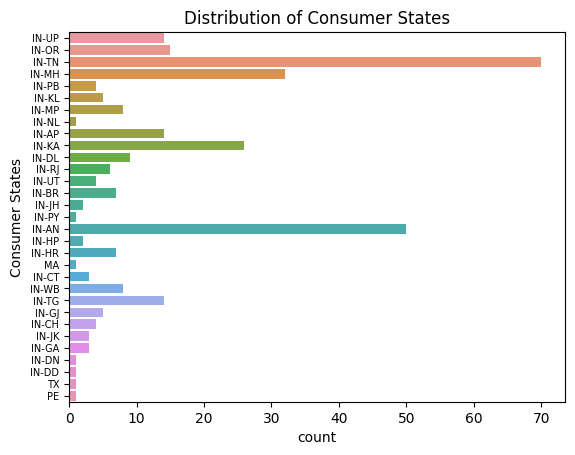

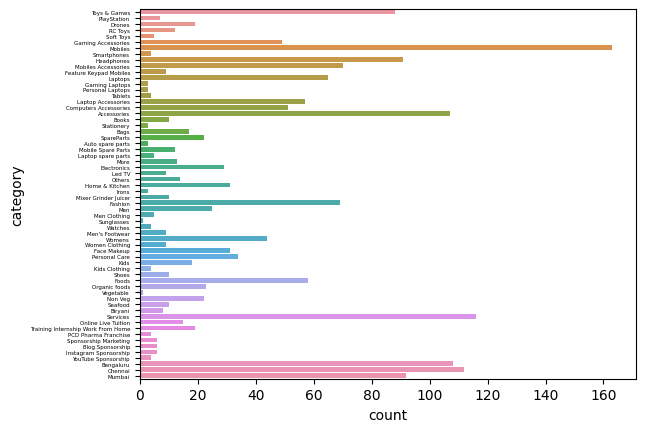

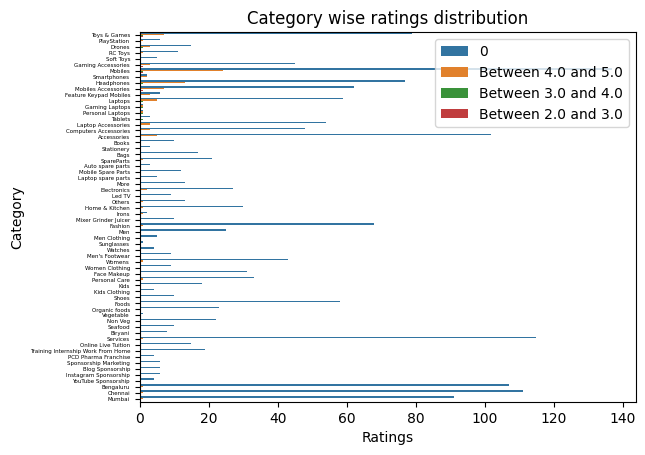

AttributeError: module 'matplotlib.pyplot' has no attribute 'ticks'

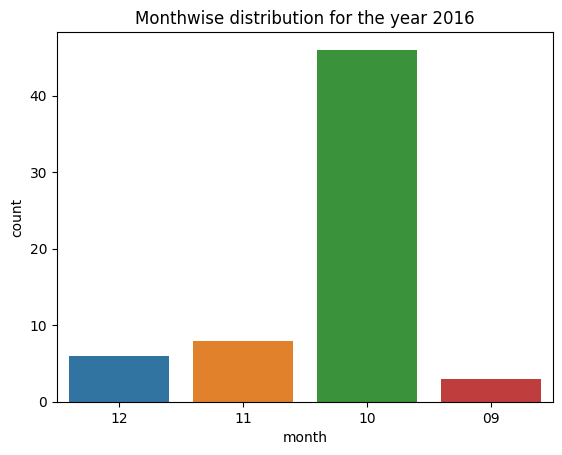

In [169]:
import matplotlib.backends.backend_pdf as pdf
# import pdfkit
# import wkhtmltopdf

df_plots = pd.DataFrame()

pdf_filename = 'analysis_plots.pdf'
pdf_pages = pdf.PdfPages(pdf_filename)
def save_plot_to_pdf(plot):
    pdf_pages.savefig(plot)
    
print("1. Analysis of Reviews given by Customers \n2. Analysis of different payment methods used by the Customers \n3. Analysis of Top Consumer States of India \n4. Analysis of Top Consumer Cities of India \n5. Analysis of Top Selling Product Categories \n6. Analysis of Reviews for All Product Categories \n7. Analysis of Number of Orders Per Month Per Year \n8. Analysis of Reviews for Number of Orders Per Month Per Year \n9. Analysis of Number of Orders Across Parts of a Day \n10. Full Report")
option=input("Enter the analysis you wish to see : ")
if option=='1':
    sns.countplot(y=reviews_data['stars'])
    plt.xlabel("Ratings")
    plt.title("Distribution of various ratings given by customers")
    save_plot_to_pdf(plt.gcf())
    plt.show()
    plt.close()
    df=pd.DataFrame(reviews_data['stars'].value_counts())
    plt.pie(df['stars'],labels=df['stars'].index)
    plt.savefig('plot1.png')
    df_plots['Plot'] = ['plot1.png']
    save_plot_to_pdf(plt.gcf())
    plt.show()
    plt.close()

if option == '3':
    sns.countplot(y=orders_data['Billing State'])
    plt.yticks(fontsize=7)
    plt.ylabel("Consumer States")
    plt.title("Distribution of Consumer States")
    save_plot_to_pdf(plt.gcf())
    plt.savefig('plot1.png')
    df_plots['Plot'] = ['plot2.png']
    plt.show()
    plt.close()
    
if option=='5':
    sns.countplot(y=reviews_data['category'])
    plt.yticks(fontsize=4)
    save_plot_to_pdf(plt.gcf())
    plt.savefig('plot1.png')
    df_plots['Plot'] = ['plot3.png']
    plt.show()
    plt.close()
    
if option=='6':
    ratings=[]
    for i in reviews_data['stars']:
        if isinstance(i, str):
            split_i = i.split()
            rating = split_i[0]
            ratings.append(rating)
        else:
            ratings.append(0)
    updated_ratings=[]
    for i in ratings:
        m=float(i)
        if m>=2.0 and m<3.0:
            updated_ratings.append('Between 2.0 and 3.0')
        elif m>=3.0 and m<4.0:
            updated_ratings.append('Between 3.0 and 4.0')
        elif m>=4.0 and m<5.0:
            updated_ratings.append('Between 4.0 and 5.0')
        else:
            updated_ratings.append('0')

    sns.countplot(hue=updated_ratings,y=reviews_data['category'])
    plt.yticks(fontsize=4)
    plt.ylabel('Category')
    plt.xlabel('Ratings')
    plt.title('Category wise ratings distribution')
    save_plot_to_pdf(plt.gcf())
    plt.savefig('plot1.png')
    df_plots['Plot'] = ['plot4.png']
    plt.show()
    plt.close()
    
if option=='7':
    monthwiseorders('2016')
    monthwiseorders('2017')
    monthwiseorders('2018')
    monthwiseorders('2019')
    monthwiseorders('2020')
    
if option=='8':
    sns.countplot(reviews_data['status'])
    plt.title('Number of orders reviewed and not reviewed')
    save_plot_to_pdf(plt.gcf())
    plt.savefig('plot1.png')
    df_plots['Plot'] = ['plot5.png']
    plt.show()
    plt.close()
    
if option == '9':
    datewiseorders('January','01')
    datewiseorders('February','02')
    datewiseorders('March','03')
    datewiseorders('April','04')
    datewiseorders('May','05')
    datewiseorders('June','06')
    datewiseorders('July','07')
    datewiseorders('August','08')
    datewiseorders('September','09')
    datewiseorders('October','10')
    datewiseorders('November','11')
    datewiseorders('December','12')

if option=='10':
    sns.countplot(y=reviews_data['stars'])
    plt.xlabel("Ratings")
    plt.title("Distribution of various ratings given by customers")
    save_plot_to_pdf(plt.gcf())
    plt.show()
    plt.close()
    df=pd.DataFrame(reviews_data['stars'].value_counts())
    plt.pie(df['stars'],labels=df['stars'].index)
    plt.savefig('plot1.png')
    df_plots['Plot'] = ['plot1.png']
    save_plot_to_pdf(plt.gcf())
    plt.show()
    plt.close()
    sns.countplot(y=orders_data['Billing State'])
    plt.yticks(fontsize=7)
    plt.ylabel("Consumer States")
    plt.title("Distribution of Consumer States")
    save_plot_to_pdf(plt.gcf())
    plt.savefig('plot1.png')
    df_plots['Plot'] = ['plot2.png']
    plt.show()
    plt.close()
    sns.countplot(y=reviews_data['category'])
    plt.yticks(fontsize=4)
    save_plot_to_pdf(plt.gcf())
    plt.savefig('plot1.png')
    df_plots['Plot'] = ['plot3.png']
    plt.show()
    plt.close() 
    ratings=[]
    for i in reviews_data['stars']:
        if isinstance(i, str):
            split_i = i.split()
            rating = split_i[0]
            ratings.append(rating)
        else:
            ratings.append(0)
    updated_ratings=[]
    for i in ratings:
        m=float(i)
        if m>=2.0 and m<3.0:
            updated_ratings.append('Between 2.0 and 3.0')
        elif m>=3.0 and m<4.0:
            updated_ratings.append('Between 3.0 and 4.0')
        elif m>=4.0 and m<5.0:
            updated_ratings.append('Between 4.0 and 5.0')
        else:
            updated_ratings.append('0')

    sns.countplot(hue=updated_ratings,y=reviews_data['category'])
    plt.yticks(fontsize=4)
    plt.ylabel('Category')
    plt.xlabel('Ratings')
    plt.title('Category wise ratings distribution')
    save_plot_to_pdf(plt.gcf())
    plt.savefig('plot1.png')
    df_plots['Plot'] = ['plot4.png']
    plt.show()
    plt.close()
    monthwiseorders('2016')
    monthwiseorders('2017')
    monthwiseorders('2018')
    monthwiseorders('2019')
    monthwiseorders('2020')
    sns.countplot(reviews_data['status'])
    plt.title('Number of orders reviewed and not reviewed')
    save_plot_to_pdf(plt.gcf())
    plt.savefig('plot1.png')
    df_plots['Plot'] = ['plot5.png']
    plt.show()
    plt.close()
    datewiseorders('January','01')
    datewiseorders('February','02')
    datewiseorders('March','03')
    datewiseorders('April','04')
    datewiseorders('May','05')
    datewiseorders('June','06')
    datewiseorders('July','07')
    datewiseorders('August','08')
    datewiseorders('September','09')
    datewiseorders('October','10')
    datewiseorders('November','11')
    datewiseorders('December','12')
excel_filename = 'analysis_plots.xlsx'
with pd.ExcelWriter(excel_filename) as writer:
    df_plots.to_excel(writer, index=False)

print(f"Plots saved in the Excel file: {excel_filename}.")

In [26]:
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861 entries, 0 to 1860
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  1861 non-null   object
 1   product_url   1861 non-null   object
 2   category      1861 non-null   object
 3   status        606 non-null    object
 4   stars         606 non-null    object
dtypes: object(5)
memory usage: 72.8+ KB


In [27]:
reviews_data['category'].unique()


array(['Toys & Games', 'PlayStation', 'Drones', 'RC Toys', 'Soft Toys',
       'Gaming Accessories', 'Mobiles', 'Smartphones', 'Headphones',
       'Mobiles Accessories', 'Feature Keypad Mobiles', 'Laptops',
       'Gaming Laptops', 'Personal Laptops', 'Tablets',
       'Laptop Accessories', 'Computers Accessories', 'Accessories',
       'Books', 'Stationery', 'Bags', 'SpareParts', 'Auto spare parts',
       'Mobile Spare Parts', 'Laptop spare parts', 'More', 'Electronics',
       'Led TV', 'Others', 'Home & Kitchen', 'Irons',
       'Mixer Grinder Juicer', 'Fashion', 'Men', 'Men Clothing',
       'Sunglasses', 'Watches', "Men's Footwear", 'Womens',
       'Women Clothing', 'Face Makeup', 'Personal Care', 'Kids',
       'Kids Clothing', 'Shoes', 'Foods', 'Organic foods', 'Vegetable',
       'Non Veg', 'Seafood', 'Biryani', 'Services', 'Online Live Tuition',
       'Training Internship Work From Home', 'PCD Pharma Franchise',
       'Sponsorship Marketing', 'Blog Sponsorship',
       'I

In [32]:
reviews_data['status'].unique()

array(['Reviewd', nan], dtype=object)

In [34]:
reviews_data['status']=reviews_data['status'].fillna('NULL')

In [35]:
reviews_data['status'].unique()

array(['Reviewd', 'NULL'], dtype=object)

<Axes: xlabel='status', ylabel='count'>

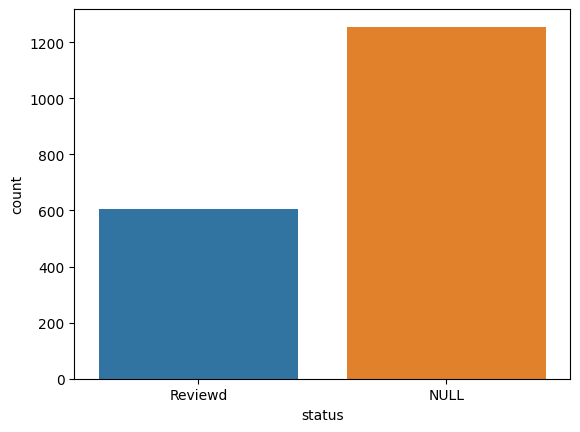

In [36]:
sns.countplot(reviews_data['status'])

In [38]:
orders_data.head()

,Order #,Order Date and Time Stamp,Fulfillment Status,Payment Status,Payment Date and Time Stamp,Fulfillment Date and Time Stamp,Currency,Subtotal,Shipping Method,Shipping Cost,...,Payment Method,Tracking #,Special Instructions,LineItem Name,LineItem SKU,LineItem Options,LineItem Add-ons,LineItem Qty,LineItem Sale Price,LineItem Type
0,R929392577,09-11-2020 20:36:26 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 799.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Boat Rockerz 530 Bluetooth Headphone with Mic ...,NaN,NaN,NaN,1,₹ 799.00,physical
1,R653462960,09-11-2020 20:18:26 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 699.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Samsung U Flex Wireless Bluetooth Flexible Hea...,PL000032123,NaN,NaN,1,₹ 699.00,physical
2,R226302759,09-11-2020 19:56:21 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 799.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Boat Rockerz 530 Bluetooth Headphone with Mic ...,NaN,NaN,NaN,1,₹ 799.00,physical
3,R390235057,09-11-2020 19:37:40 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 599.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,JBL Tempo On-Ear Headphone,PL000157,NaN,NaN,1,₹ 599.00,physical
4,R813855117,09-11-2020 18:35:47 +0530,Cancelled,Paid,NaN,NaN,INR,₹ 699.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Mi Neckband Bluetooth Headset with Mic (Black),PL000041332,NaN,NaN,1,₹ 699.00,physical


In [80]:
dates=[]
monthwise=[]
year=[]
for i in orders_data['Order Date and Time Stamp']:
    x=i.split()[0]
    dates.append(x)
orders_data['date']=dates
for i in dates:
    y=i.split()
    for j in y:
        x=j.split('-')[1]
        monthwise.append(x)
    for j in y:
        d=j.split('-')[2]
        year.append(d)
orders_data['year']=year
orders_data['month']=monthwise    
orders_data.head()
    

,Order #,Order Date and Time Stamp,Fulfillment Status,Payment Status,Payment Date and Time Stamp,Fulfillment Date and Time Stamp,Currency,Subtotal,Shipping Method,Shipping Cost,...,LineItem Name,LineItem SKU,LineItem Options,LineItem Add-ons,LineItem Qty,LineItem Sale Price,LineItem Type,date,month,year
0,R929392577,09-11-2020 20:36:26 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 799.00,Ships Free,₹ 0.00,...,Boat Rockerz 530 Bluetooth Headphone with Mic ...,NaN,NaN,NaN,1,₹ 799.00,physical,09-11-2020,11,2020
1,R653462960,09-11-2020 20:18:26 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 699.00,Ships Free,₹ 0.00,...,Samsung U Flex Wireless Bluetooth Flexible Hea...,PL000032123,NaN,NaN,1,₹ 699.00,physical,09-11-2020,11,2020
2,R226302759,09-11-2020 19:56:21 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 799.00,Ships Free,₹ 0.00,...,Boat Rockerz 530 Bluetooth Headphone with Mic ...,NaN,NaN,NaN,1,₹ 799.00,physical,09-11-2020,11,2020
3,R390235057,09-11-2020 19:37:40 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 599.00,Ships Free,₹ 0.00,...,JBL Tempo On-Ear Headphone,PL000157,NaN,NaN,1,₹ 599.00,physical,09-11-2020,11,2020
4,R813855117,09-11-2020 18:35:47 +0530,Cancelled,Paid,NaN,NaN,INR,₹ 699.00,Ships Free,₹ 0.00,...,Mi Neckband Bluetooth Headset with Mic (Black),PL000041332,NaN,NaN,1,₹ 699.00,physical,09-11-2020,11,2020


In [167]:
def datewiseorders(month,number):
    sns.countplot(data=orders_data[orders_data['month']==number],y='date')
    plt.title(f"Day wise orders for the month of {month}")
    plt.yticks(fontsize=4)
    save_plot_to_pdf(plt.gcf())
    plt.savefig('plot1.png')
    df_plots['Plot'] = ['plot6.png']
    plt.show()
    plt.close()


In [159]:
def monthwiseorders(year):
    sns.countplot(data=orders_data[orders_data['year']==year],x='month')
    plt.title(f'Monthwise distribution for the year {year}')
    save_plot_to_pdf(plt.gcf())
    plt.savefig('plot1.png')
    df_plots['Plot'] = ['plot7.png']
    plt.show()
    plt.close()